# Lisa confirmed that LPR for Phase I,II have two sets of timepoints 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, random, time

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/0_before_reformat/LPR/3_analyze_diff_NA_rows


In [3]:
##### file path only

# mac - phase I,II - LPR - after_Lisa_plate_id_fix - "240" endpoints only
complete_input_file_path= '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/after_Lisa_fix/full/240_endpoints/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_w_240_endpoints.csv'
# 196 unique chemical.IDs

# constance - phase I,II - LPR
#complete_input_file_path = '/people/kimd999/tox/phase_I_II/data/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX.csv'

In [4]:
df_behav = pd.read_csv(complete_input_file_path, header = 0)

df_behav['chemical.id'] = df_behav['chemical.id'].astype(str)
# this string recasting is needed for "behav_select_1030 = behav_select.loc[behav_select['chemical.id'] == '1030',:]" later

df_behav.head()

,chemical.id,conc,plate.id,well,endpoint,value
0,1030,NaN,NaN,NaN,t0,NaN
1,1030,0.0,9414.0,A06,t0,0.0
2,1030,0.0,9414.0,A12,t0,2.7
3,1030,0.0,9414.0,B06,t0,0.5
4,1030,0.0,9414.0,B12,t0,0.0


In [5]:
chemical_id_count = 0
for chemical_id in np.unique(df_behav['chemical.id']):
    chemical_id_count += 1
print ("chemical_id_count:"+str(chemical_id_count))

chemical_id_count:196


In [17]:
# Keep only relevant columns
columns_to_keep = ['chemical.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']
df_select = df_behav.loc[:,columns_to_keep]
df_select.head()

,chemical.id,conc,plate.id,well,endpoint,value
0,1030,NaN,NaN,NaN,t0,NaN
1,1030,0.0,9414.0,A06,t0,0.0
2,1030,0.0,9414.0,A12,t0,2.7
3,1030,0.0,9414.0,B06,t0,0.5
4,1030,0.0,9414.0,B12,t0,0.0


In [24]:
# drop rows if the # of its chemical based NA rows = 240
start_time = time.time()

len_endpoint = []
df_select_wo_240_based_NA_rows = pd.DataFrame()
    
full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(df_select['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(chemical_id_from_here), 1)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])
        
total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    print("\nchemical_index:" + str(chemical_index))
    
    df_chemical = df_select.loc[df_select['chemical.id'] == chemical_index,:]
    df_chemical_na = df_chemical[df_chemical.isna().any(axis=1)]
 
    len_endpoint.append(len(np.unique(df_chemical['endpoint'])))
    
    if (len(df_chemical_na) == 240):
        print ("Safely remove NA rows from this chemical")
        df_chemical_wo_na = df_chemical.dropna(how='any')
        df_select_wo_240_based_NA_rows = pd.concat([df_select_wo_240_based_NA_rows, df_chemical_wo_na])
    else:
        df_select_wo_240_based_NA_rows = pd.concat([df_select_wo_240_based_NA_rows, df_chemical])
    
    number_of_chemicals_processed += 1
    print_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(print_this)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Dropping rows of 240 NA is done, it took:"+str(time_took)) 
# took 5~6 minutes to process 196 chemicals


chemical_index:1030
1 chemicals processed out of 196

chemical_index:1031
Safely remove NA rows from this chemical
2 chemicals processed out of 196

chemical_index:1105
3 chemicals processed out of 196

chemical_index:1114
4 chemicals processed out of 196

chemical_index:1161
5 chemicals processed out of 196

chemical_index:1163
Safely remove NA rows from this chemical
6 chemicals processed out of 196

chemical_index:1166
Safely remove NA rows from this chemical
7 chemicals processed out of 196

chemical_index:1171
Safely remove NA rows from this chemical
8 chemicals processed out of 196

chemical_index:1172
Safely remove NA rows from this chemical
9 chemicals processed out of 196

chemical_index:1174
Safely remove NA rows from this chemical
10 chemicals processed out of 196

chemical_index:1175
11 chemicals processed out of 196

chemical_index:1176
12 chemicals processed out of 196

chemical_index:1177
Safely remove NA rows from this chemical
13 chemicals processed out of 196

chemic

<AxesSubplot:ylabel='count'>

<Figure size 432x288 with 0 Axes>

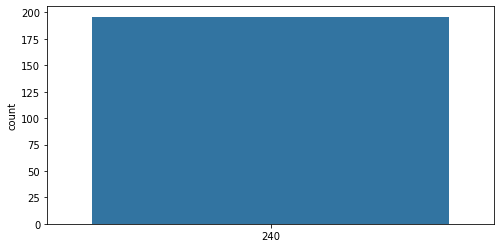

In [25]:
ds = pd.Series({"Column": len_endpoint})
plt.savefig("distribute.png")

plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)

# all belows are now archived only,,,

In [20]:
display(len(df_select))
display (len(np.unique(df_select['chemical.id'])))

display(len(df_select_wo_240_based_NA_rows))
display (len(np.unique(df_select_wo_240_based_NA_rows['chemical.id'])))

11184240

196

11166240

196

In [ ]:
### Count number of endpoints
start_time = time.time()
    
len_endpoint = []
    
full_devel = "full"
#full_devel = "devel"

chemical_id_from_here = np.unique(df_select['chemical.id'])
if (full_devel == "devel"):
    randomly_chosen = random.sample(set(chemical_id_from_here), 1)
    chemical_id_from_here = []
    for i in range(len(randomly_chosen)):
        chemical_id_from_here.append(randomly_chosen[i])
        
total_number_of_chemicals_to_processed = len(chemical_id_from_here)
number_of_chemicals_processed = 0

for chemical_index in chemical_id_from_here:
    print("chemical_index:" + str(chemical_index))
    
    df_chemical = df_select_wo_240_based_NA_rows.loc[df_select_wo_240_based_NA_rows['chemical.id'] == chemical_index,:]
    
    len_endpoint.append(len(np.unique(df_chemical['endpoint'])))
    
    number_of_chemicals_processed += 1
    write_this = str(number_of_chemicals_processed) + " chemicals processed out of " + str(total_number_of_chemicals_to_processed)
    print(write_this)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Counting number of endpoints is done, it took:"+str(time_took)) 
# took 2 minutes for 196 chemicals

<AxesSubplot:ylabel='count'>

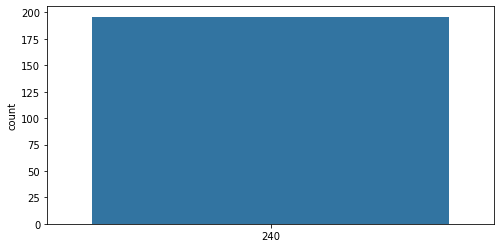

In [22]:
ds = pd.Series({"Column": len_endpoint})
plt.savefig("distribute.png")

plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)

In [23]:
output_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_wo_240_rows_NA.csv"
print ("output_filename:"+str(output_filename))
df_select_wo_240_based_NA_rows.to_csv(output_filename,index=False)

output_filename:/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/after_Lisa_fix/full/240_endpoints/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_w_240_endpoints_full_wo_240_rows_NA.csv


# do not run below (all were investigational)




In [9]:
display(len(df_select))
df_select = df_select.dropna(how='any')
display(len(df_select))

11184240

10977439

In [64]:
df_select_new_column_name = df_select.rename(columns={'chemical.id': 'chemical_id'})

In [ ]:
#1030
'''
behav_select_new_column_name_1030 = behav_select_new_column_name[behav_select_new_column_name.chemical_id == '1030']

display(behav_select_new_column_name_1030.head())
display(len(behav_select_new_column_name_1030))

behav_select_new_column_name_1030_na = behav_select_new_column_name_1030[behav_select_new_column_name_1030.isna().any(axis=1)]
display(len(behav_select_new_column_name_1030_na))
display(behav_select_new_column_name_1030_na.head())
display(behav_select_new_column_name_1030_na.tail())

behav_select_new_column_name_1030_na.to_csv('behav_select_new_column_name_1030_na.csv',index=False)
'''

In [ ]:
#1031
'''behav_select_new_column_name_1031 = behav_select_new_column_name[behav_select_new_column_name.chemical_id == '1031']

#display(behav_select_new_column_name_1031.head())
display(len(behav_select_new_column_name_1031))

behav_select_new_column_name_1031_na = behav_select_new_column_name_1031[behav_select_new_column_name_1031.isna().any(axis=1)]
#display(len(behav_select_new_column_name_1031_na))
display(behav_select_new_column_name_1031_na.head())'''

In [8]:
df_select_na = df_select[df_select.isna().any(axis=1)]
#display(behav_select_na.head())

df_select_na_new = df_select_na.rename(columns={'chemical.id': 'chemical_id'})

#behav_select_na_1030 = behav_select_na[behav_select_na_new.chemical_id == '1030']
#display(len(behav_select_na_1030))

#behav_select_na_1031 = behav_select_na[behav_select_na_new.chemical_id == '1031']
#display(len(behav_select_na_1031))


#behav_select_na_no_1030 = behav_select_na[behav_select_na_new.chemical_id != '1030']
#display(len(behav_select_na_no_1030))
#display(behav_select_na_no_1030.head())

In [38]:
'''behav_select_1030 = behav_select.loc[behav_select['chemical.id'] == '1030',:]
display(len(behav_select_1030))
display(behav_select_1030.head())

behav_select_1030.to_csv('behav_select_1030.csv',index=False)
'''

46320

,chemical.id,conc,plate.id,well,endpoint,value
0,1030,NaN,NaN,NaN,t0,NaN
1,1030,0.0,9414,A06,t0,0.0
2,1030,0.0,9414,A12,t0,2.7
3,1030,0.0,9414,B06,t0,0.5
4,1030,0.0,9414,B12,t0,0.0


In [71]:
display(behav_select_wo_240_based_NA_rows.head())


,chemical.id,conc,plate.id,well,endpoint,value
0,1030,NaN,NaN,NaN,t0,NaN
1,1030,0.0,9414,A06,t0,0.0
2,1030,0.0,9414,A12,t0,2.7
3,1030,0.0,9414,B06,t0,0.5
4,1030,0.0,9414,B12,t0,0.0


In [72]:
display(len(behav_select_wo_240_based_NA_rows))

7901040

In [6]:
#len(behav_all_data)

In [7]:
#TX_bottle_id_behav_all_data = behav_all_data[behav_all_data['bottle.id'].str.contains("^TX")]
#TX_bottle_id_behav_all_data.head()

In [8]:
#len(TX_bottle_id_behav_all_data)

In [9]:
##### (start) replace plate.id in behavioral data with plate.id in morphological data (common data will be bottle.id)

#mac
#complete_morph_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/Phase_I_II/input/morphology/tall/zf_morphology_data_335_chemicals_2020DEC16.csv'

#constance
#complete_morph_file_path = '/people/kimd999/tox/phase_I_II_close_file_frequently/data/zf_morphology_data_335_chemicals_2020DEC16.csv'

#morph_all_data = pd.read_csv(complete_morph_file_path, header = 0)
#morph_all_data.head()

In [11]:
#len(morph_all_data)

In [12]:
#TX_bottle_id_morph_all_data = morph_all_data[morph_all_data['bottle.id'].str.contains("^TX")]
#TX_bottle_id_morph_all_data.head()

In [13]:
#len(TX_bottle_id_morph_all_data)

In [14]:
#new_behav_all_data = TX_bottle_id_behav_all_data.loc[TX_bottle_id_morph_all_data['bottle.id'],['chemical.id', 'bottle.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']]

In [15]:
##### (end) replace plate.id in behavioral data with plate.id in morphological data (common data will be bottle.id)

In [16]:
#new_behav_all_data = behav_all_data.loc[behav_all_data['bottle.id'] == "TX002271",['chemical.id', 'bottle.id', 'conc', 'plate.id', 'well', 'endpoint', 'value']]

In [17]:
#new_behav_all_data.head()

In [20]:
#display(np.unique(behav_all_data['endpoint']))

In [21]:
#display(np.unique(behav_all_data_select['endpoint']))

In [22]:
#reformat_data.head()

In [23]:
#reformat_data.shape

In [24]:
#reformat_data.to_csv('Phase_I_II_t3_t17_LPR.csv',index=False)

In [25]:
###### replace plate id with what is listed in the morphology data to the LPR.
###### for your example, TP967-E9-P1, will go in place of plate.id “1” in the LPR file.

# read morpho data and match/join


In [ ]:
display(behav_data_chemical_w_240_endpoints)
display(behav_data_chemical_w_15_endpoints)

In [28]:
#reformatted_data_filename = str(complete_input_file_path[:-4]) + "_" + str(full_devel) + "_w_15_endpoints.csv"
#print ("reformatted_data_filename:"+str(reformatted_data_filename))
#behav_data_chemical_w_15_endpoints.to_csv(reformatted_data_filename,index=False)

In [37]:
display(len(np.unique(behav_data_chemical_w_240_endpoints['chemical.id'])))

display(len(np.unique(behav_data_chemical_w_15_endpoints['chemical.id'])))

196

148